In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load preprocessed data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
# Define the original neural network model
def build_dnn_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Define a Convolutional Neural Network (CNN) model
def build_cnn_model():
    model = keras.Sequential([
        keras.layers.Reshape(target_shape=(X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Define a more complex Deep Neural Network (DNN) model
def build_complex_dnn_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Function to plot model architecture
def plot_model_architecture(model):
    keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    img = plt.imread('model_architecture.png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)

    plt.figure()
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.show()

In [7]:
# Train and evaluate a model
def train_and_evaluate_model(model, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    print(f"{model_name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"{model_name} - ROC-AUC Score:")
    print(roc_auc_score(y_test, y_pred_proba))

    plot_training_history(history)
    plot_roc_curve(y_test, y_pred_proba)
    plot_precision_recall_curve(y_test, y_pred_proba)

# Function to save the model
def save_model(model, model_name):
    model.save(f'{model_name.lower().replace(" ", "_")}_model.h5')

# Function to plot correlation matrix of model predictions
def plot_correlation_matrix(predictions):
    # Flatten the prediction arrays and convert them to a DataFrame
    preds_df = pd.DataFrame({name: preds.flatten() for name, preds in predictions.items()})

    # Compute the correlation matrix
    corr_matrix = preds_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
                xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
    plt.title('Model Predictions Correlation Matrix')
    plt.show()



Training Original DNN...
Epoch 1/50
1400/1400 [==============================] - 4s 2ms/step - loss: 0.6514 - accuracy: 0.6315 - val_loss: 0.6054 - val_accuracy: 0.6809
Epoch 2/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.6121 - accuracy: 0.6803 - val_loss: 0.5771 - val_accuracy: 0.7161
Epoch 3/50
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5937 - accuracy: 0.7086 - val_loss: 0.5621 - val_accuracy: 0.7323
Epoch 4/50
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5826 - accuracy: 0.7152 - val_loss: 0.5553 - val_accuracy: 0.7325
Epoch 5/50
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5735 - accuracy: 0.7208 - val_loss: 0.5525 - val_accuracy: 0.7337
Epoch 6/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5687 - accuracy: 0.7238 - val_loss: 0.5480 - val_accuracy: 0.7350
Epoch 7/50
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5664 - accuracy: 0.7214 - val_lo

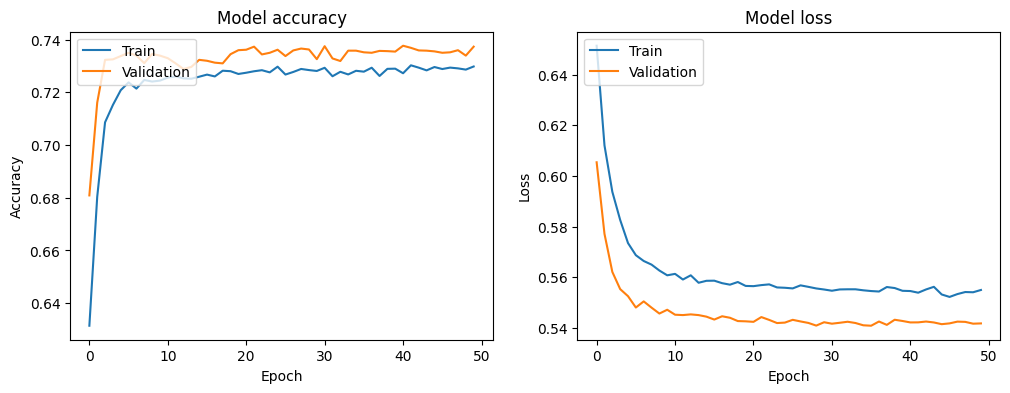

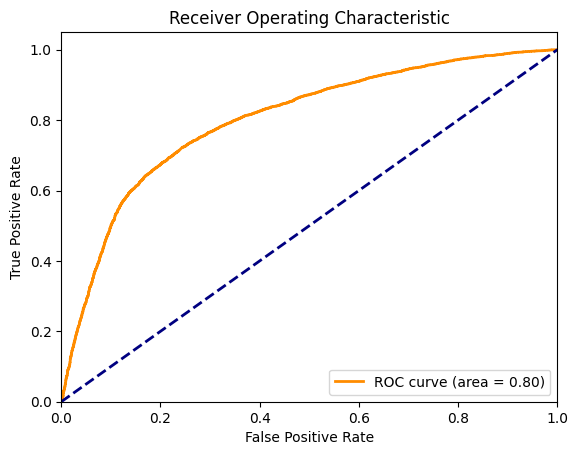

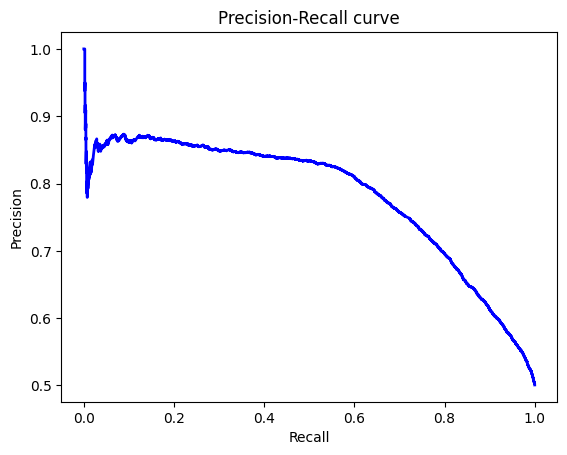

 78/438 [====>.........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


438/438 [==============================] - 1s 1ms/step

Training CNN...
Epoch 1/50
1400/1400 [==============================] - 6s 3ms/step - loss: 0.6103 - accuracy: 0.6792 - val_loss: 0.5723 - val_accuracy: 0.7154
Epoch 2/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.5698 - accuracy: 0.7169 - val_loss: 0.5527 - val_accuracy: 0.7295
Epoch 3/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5624 - accuracy: 0.7215 - val_loss: 0.5471 - val_accuracy: 0.7310
Epoch 4/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5590 - accuracy: 0.7262 - val_loss: 0.5489 - val_accuracy: 0.7295
Epoch 5/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.5568 - accuracy: 0.7279 - val_loss: 0.5496 - val_accuracy: 0.7312
Epoch 6/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5562 - accuracy: 0.7285 - val_loss: 0.5503 - val_accuracy: 0.7275
Epoch 7/50
1400/1400 [==============================] - 4s 3ms/s

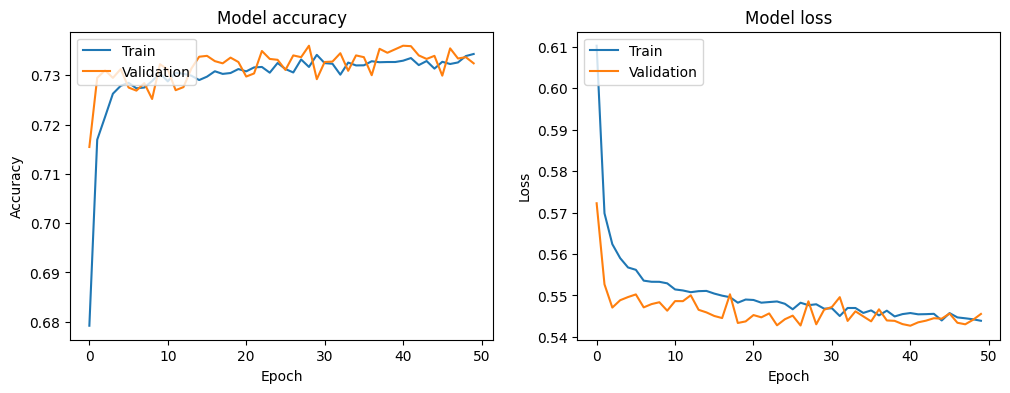

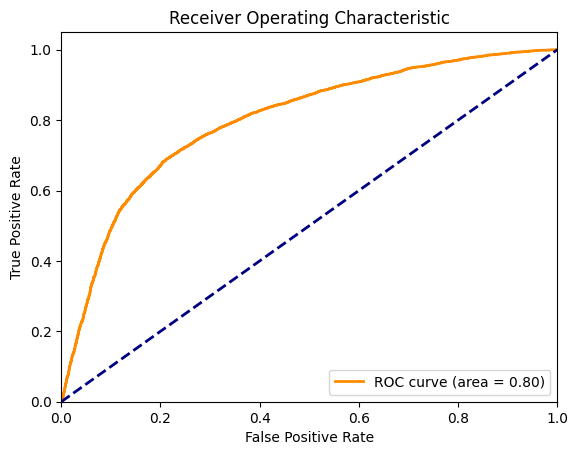

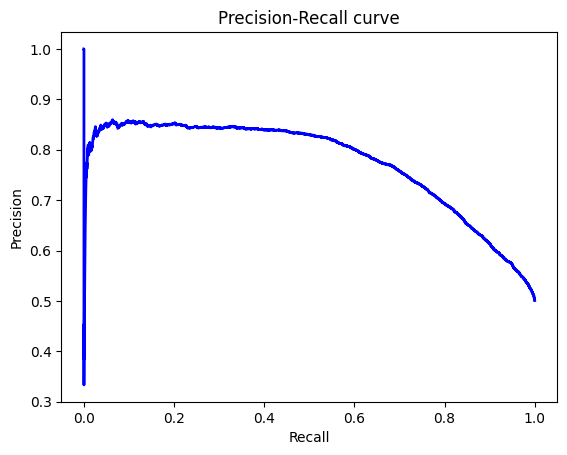

 29/438 [>.............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


438/438 [==============================] - 1s 2ms/step

Training Complex DNN...
Epoch 1/50
1400/1400 [==============================] - 6s 4ms/step - loss: 0.6663 - accuracy: 0.6001 - val_loss: 0.6200 - val_accuracy: 0.6766
Epoch 2/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.6222 - accuracy: 0.6765 - val_loss: 0.5779 - val_accuracy: 0.7192
Epoch 3/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5994 - accuracy: 0.7069 - val_loss: 0.5629 - val_accuracy: 0.7280
Epoch 4/50
1400/1400 [==============================] - 5s 4ms/step - loss: 0.5937 - accuracy: 0.7129 - val_loss: 0.5567 - val_accuracy: 0.7312
Epoch 5/50
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5845 - accuracy: 0.7158 - val_loss: 0.5563 - val_accuracy: 0.7265
Epoch 6/50
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5819 - accuracy: 0.7188 - val_loss: 0.5544 - val_accuracy: 0.7279
Epoch 7/50
1400/1400 [==============================] - 

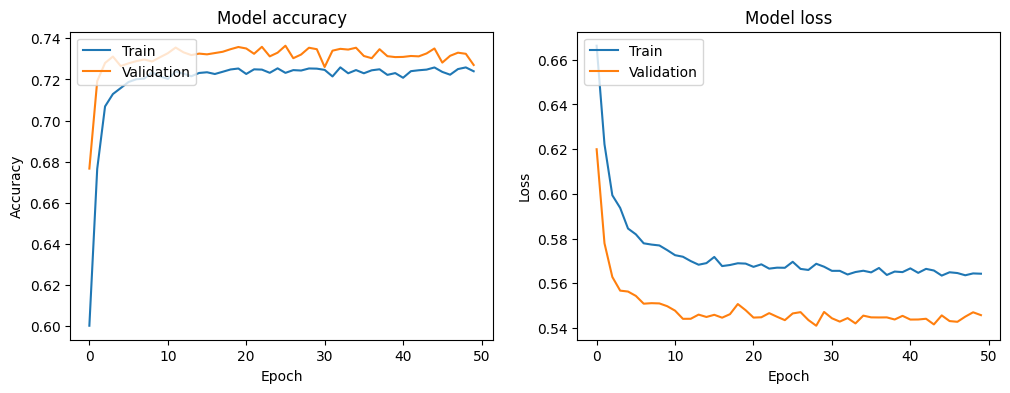

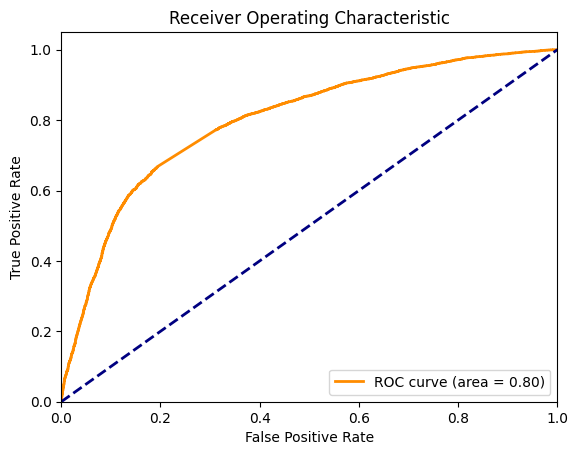

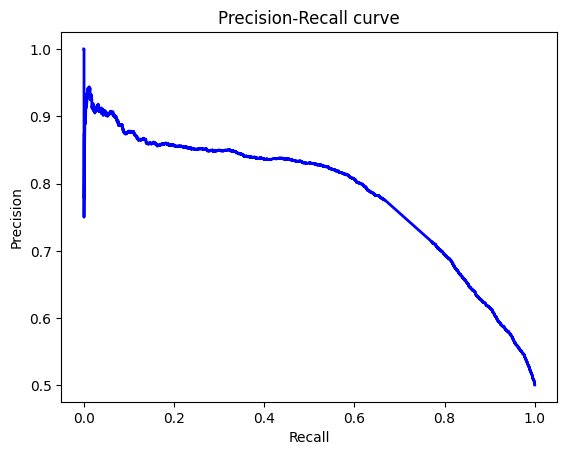

 36/438 [=>............................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


438/438 [==============================] - 1s 1ms/step


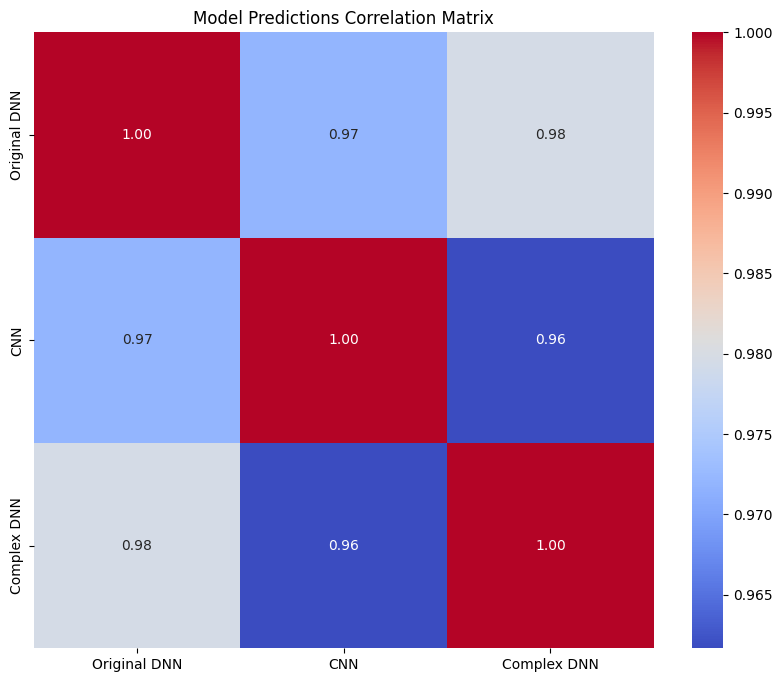

In [8]:
# Build, train, and evaluate each model
models = {
    "Original DNN": build_dnn_model(),
    "CNN": build_cnn_model(),
    "Complex DNN": build_complex_dnn_model()
}

predictions = {}

for model_name, model in models.items():
    train_and_evaluate_model(model, model_name)
    save_model(model, model_name)
    y_pred_proba = model.predict(X_test)
    predictions[model_name] = y_pred_proba

# Plot the correlation matrix of model predictions
plot_correlation_matrix(predictions)